In [1]:
# Test migration history reconstruction on Sanborn et. al. Melanoma data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
from src.util.plotting_util import PrintConfig

import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


14:05:52 INFO
NumExpr defaulting to 8 threads.


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:
def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    data = data_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    
    for adj_matrix, pruned_cluster_label_to_idx in data:
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}
        G = data_util.get_genetic_distance_tensor_from_adj_matrix(T, pruned_cluster_label_to_idx, "_")

        print(unique_sites)   
        primary_idx = unique_sites.index('primary')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=2.0, gen_dist=0.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, G=G, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, lr=0.1,
                                                    max_iter=200, batch_size=64, print_config=print_config,
                                                    custom_colors=custom_colors, primary="primary", 
                                                    weight_init_primary=True, lr_sched="step")


        

num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


14:06:11 DEBUG
Loaded backend module://matplotlib_inline.backend_inline version unknown.
14:06:11 DEBUG
Loaded backend module://matplotlib_inline.backend_inline version unknown.


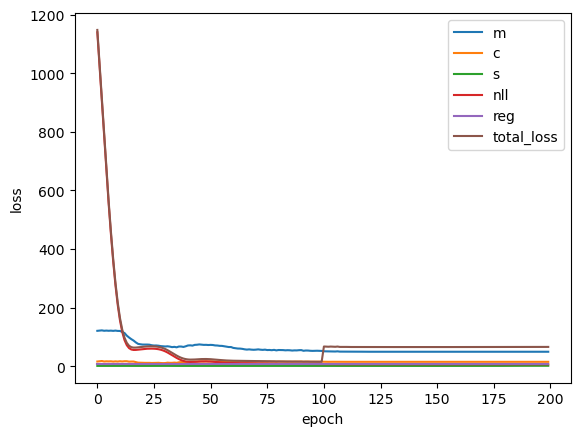

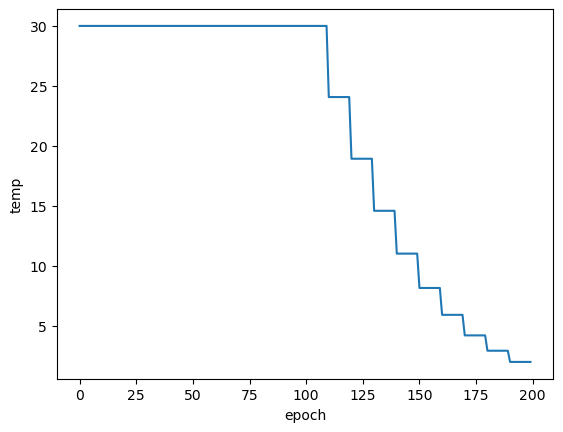

14:06:12 DEBUG

U > 0.05

14:06:12 DEBUG
                norm     0     1     2     3
primary        0.271 0.000 0.680 0.000 0.000
parotid_gland  0.820 0.000 0.000 0.086 0.000
locoregional_1 0.611 0.000 0.117 0.000 0.191
locoregional_2 0.394 0.000 0.000 0.546 0.000
14:06:12 DEBUG

F_hat
14:06:12 DEBUG
                   0     1     2     3     4
primary        0.950 0.680 0.680 0.000 0.000
parotid_gland  0.906 0.086 0.000 0.086 0.000
locoregional_1 0.919 0.308 0.308 0.000 0.191
locoregional_2 0.940 0.546 0.000 0.546 0.000
14:06:12 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 18.849234
****************************** BEST TREE ******************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 6.459
Reg: 3.999999761581421
Loss: 70.459
U_clipped
 [[0.2705109119415283, 0.0, 0.6798252463340759, 0.0, 0.0], [0.8203997015953064, 0.0, 0.0, 0.08559569716453552, 0.0], [0.6111591458320618, 0.0, 0.11683744937181473, 0.0, 0.1909639537334442], [0.3939182162284851, 0.0, 0.0, 0.5459246039390564, 0.0]]


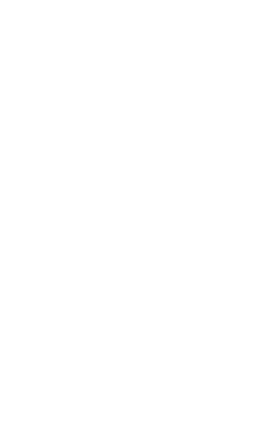

14:06:13 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


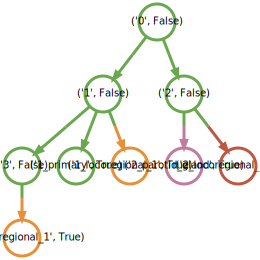

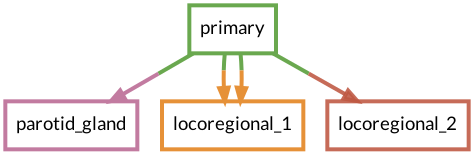

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
parotid_gland [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> parotid_gland  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
}



14:06:13 DEBUG

U > 0.05

14:06:13 DEBUG
                norm     0     1     2     3
primary        0.270 0.055 0.658 0.000 0.000
parotid_gland  0.821 0.000 0.000 0.088 0.000
locoregional_1 0.613 0.000 0.107 0.000 0.190
locoregional_2 0.387 0.000 0.000 0.552 0.000
14:06:13 DEBUG

F_hat
14:06:13 DEBUG
                   0     1     2     3     4
primary        0.984 0.714 0.658 0.000 0.000
parotid_gland  0.909 0.088 0.000 0.088 0.000
locoregional_1 0.910 0.297 0.297 0.000 0.190
locoregional_2 0.939 0.552 0.000 0.552 0.000
14:06:13 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 6.648
Reg: 4.0
Loss: 70.648
U_clipped
 [[0.27024197578430176, 0.055192627012729645, 0.658336341381073, 0.0, 0.0], [0.8205452561378479, 0.0, 0.0, 0.08816671371459961, 0.0], [0.6125126481056213, 0.0, 0.10696182399988174, 0.0, 0.1902087926864624], [0.3870691657066345, 0.0, 0.0, 0.5524035096168518, 0.0]]


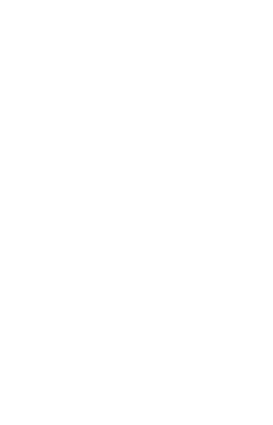

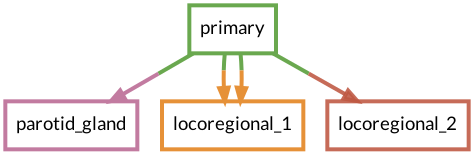

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
parotid_gland [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> parotid_gland  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
}



14:06:15 DEBUG

U > 0.05

14:06:15 DEBUG
                norm     0     1     2     3
primary        0.267 0.000 0.671 0.000 0.000
parotid_gland  0.826 0.000 0.000 0.078 0.000
locoregional_1 0.610 0.000 0.090 0.000 0.206
locoregional_2 0.387 0.000 0.000 0.545 0.000
14:06:15 DEBUG

F_hat
14:06:15 DEBUG
                   0     1     2     3     4
primary        0.938 0.671 0.671 0.000 0.000
parotid_gland  0.904 0.078 0.000 0.078 0.000
locoregional_1 0.906 0.296 0.296 0.000 0.206
locoregional_2 0.933 0.545 0.000 0.545 0.000
14:06:15 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 7.265
Reg: 4.0
Loss: 71.265
U_clipped
 [[0.2671022117137909, 0.0, 0.670998752117157, 0.0, 0.0], [0.826241135597229, 0.0, 0.0, 0.0777500793337822, 0.0], [0.6104588508605957, 0.0, 0.0900278314948082, 0.0, 0.20563438534736633], [0.38728880882263184, 0.0, 0.0, 0.5452320575714111, 0.0]]


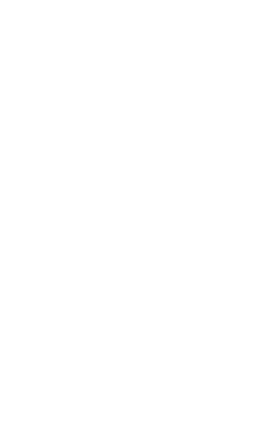

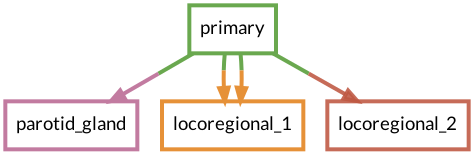

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
parotid_gland [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> parotid_gland  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
}



14:06:16 DEBUG

U > 0.05

14:06:16 DEBUG
                norm     0     1     2     3
primary        0.268 0.000 0.673 0.000 0.000
parotid_gland  0.827 0.000 0.000 0.083 0.000
locoregional_1 0.616 0.000 0.109 0.000 0.190
locoregional_2 0.391 0.000 0.000 0.565 0.000
14:06:16 DEBUG

F_hat
14:06:16 DEBUG
                   0     1     2     3     4
primary        0.941 0.673 0.673 0.000 0.000
parotid_gland  0.910 0.083 0.000 0.083 0.000
locoregional_1 0.915 0.299 0.299 0.000 0.190
locoregional_2 0.955 0.565 0.000 0.565 0.000
14:06:16 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 6.725
Reg: 4.0
Loss: 71.725
U_clipped
 [[0.2682000696659088, 0.0, 0.6725571751594543, 0.0, 0.0], [0.826869547367096, 0.0, 0.0, 0.08342906832695007, 0.0], [0.6160492897033691, 0.0, 0.10865490138530731, 0.0, 0.18991048634052277], [0.3906681537628174, 0.0, 0.0, 0.5645572543144226, 0.0]]


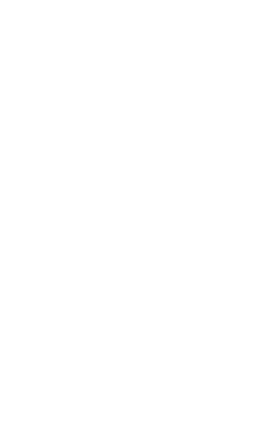

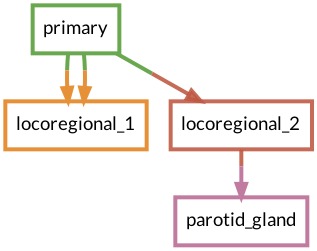

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
parotid_gland [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
locoregional_2 -> parotid_gland  [color="#be5742e1;0.5:#c27ba0ff", key=0, penwidth=3];
}



14:06:17 DEBUG

U > 0.05

14:06:17 DEBUG
                norm     0     1     2     3
primary        0.268 0.064 0.652 0.000 0.000
parotid_gland  0.826 0.000 0.000 0.077 0.000
locoregional_1 0.613 0.000 0.126 0.000 0.178
locoregional_2 0.391 0.000 0.000 0.562 0.000
14:06:17 DEBUG

F_hat
14:06:17 DEBUG
                   0     1     2     3     4
primary        0.984 0.716 0.652 0.000 0.000
parotid_gland  0.903 0.077 0.000 0.077 0.000
locoregional_1 0.916 0.304 0.304 0.000 0.178
locoregional_2 0.953 0.562 0.000 0.562 0.000
14:06:17 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 7.176
Reg: 4.000000476837158
Loss: 72.176
U_clipped
 [[0.26797914505004883, 0.06370413303375244, 0.651940643787384, 0.0, 0.0], [0.8261615633964539, 0.0, 0.0, 0.07713832706212997, 0.0], [0.6128284931182861, 0.0, 0.1260944902896881, 0.0, 0.17750225961208344], [0.3911787271499634, 0.0, 0.0, 0.5615366697311401, 0.0]]


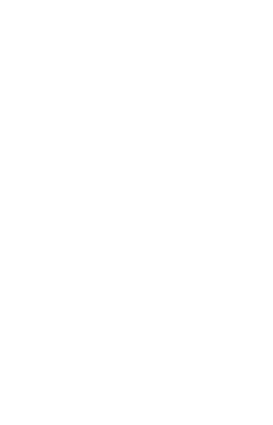

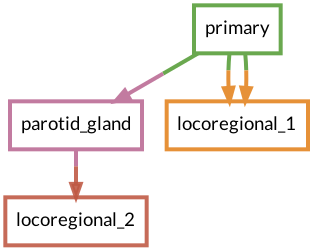

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
parotid_gland [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> parotid_gland  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
parotid_gland -> locoregional_2  [color="#c27ba0ff;0.5:#be5742e1", key=0, penwidth=3];
}



14:06:18 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------



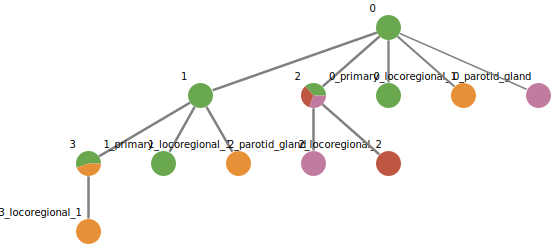

In [3]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red',  'purple', 'darkorange',]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'locoregional_1', 'locoregional_2']


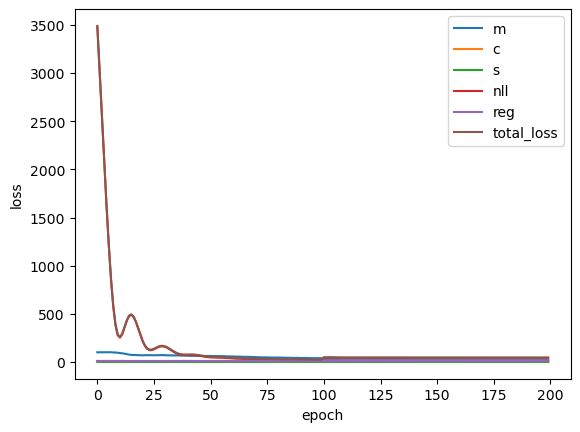

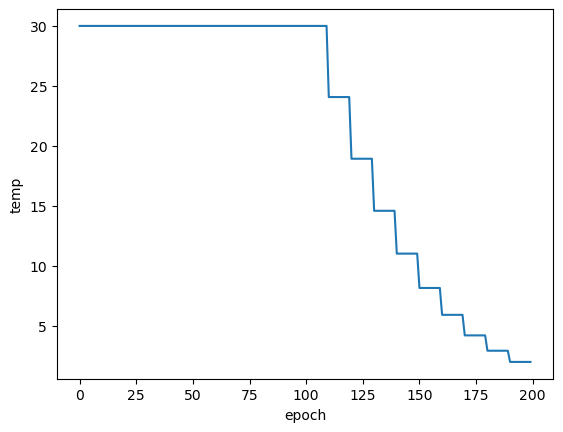

14:06:37 DEBUG

U > 0.05

14:06:37 DEBUG
                norm     0     1     2     3     4
primary        0.541 0.068 0.000 0.253 0.067 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.765 0.000
locoregional_2 0.527 0.000 0.085 0.000 0.000 0.291
14:06:37 DEBUG

F_hat
14:06:37 DEBUG
                   0     1     2     3     4     5
primary        0.930 0.388 0.000 0.253 0.067 0.000
locoregional_1 0.962 0.765 0.000 0.000 0.765 0.000
locoregional_2 0.903 0.376 0.376 0.000 0.000 0.291
14:06:37 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 18.398255
****************************** BEST TREE ******************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 14.218
Reg: 3.0
Loss: 61.218
U_clipped
 [[0.5414888262748718, 0.0675857663154602, 0.0, 0.25320929288864136, 0.067349374294281, 0.0], [0.19715598225593567, 0.0, 0.0, 0.0, 0.7646300792694092, 0.0], [0.5267906785011292, 0.0, 0.08523095399141312, 0.0, 0.0, 0.2909993529319763]]


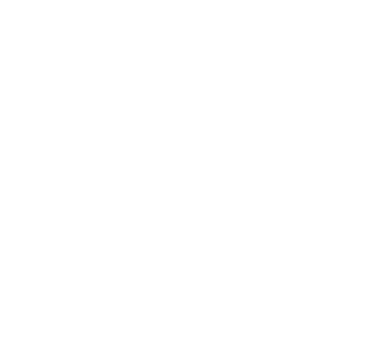

14:06:38 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


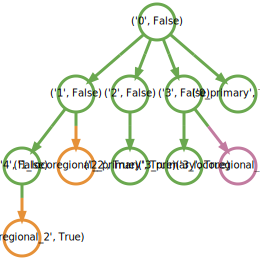

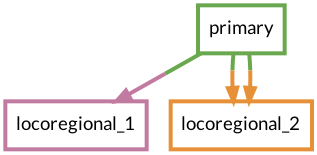

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
}



14:06:39 DEBUG

U > 0.05

14:06:39 DEBUG
                norm     0     1     2     3     4
primary        0.535 0.060 0.000 0.276 0.061 0.000
locoregional_1 0.195 0.000 0.000 0.000 0.751 0.000
locoregional_2 0.524 0.000 0.081 0.000 0.000 0.295
14:06:39 DEBUG

F_hat
14:06:39 DEBUG
                   0     1     2     3     4     5
primary        0.932 0.397 0.000 0.276 0.061 0.000
locoregional_1 0.946 0.751 0.000 0.000 0.751 0.000
locoregional_2 0.900 0.376 0.376 0.000 0.000 0.295
14:06:39 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 14.705
Reg: 3.000000238418579
Loss: 61.705
U_clipped
 [[0.535150408744812, 0.06018521636724472, 0.0, 0.27622881531715393, 0.06069481000304222, 0.0], [0.19500896334648132, 0.0, 0.0, 0.0, 0.7513594627380371, 0.0], [0.5244986414909363, 0.0, 0.08124990016222, 0.0, 0.0, 0.29466870427131653]]


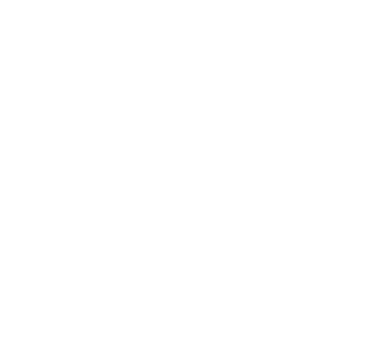

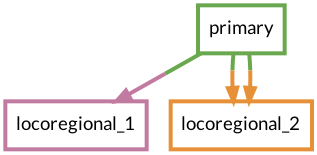

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
}



14:06:40 DEBUG

U > 0.05

14:06:40 DEBUG
                norm     0     1     2     3     4
primary        0.542 0.104 0.000 0.251 0.000 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.766 0.000
locoregional_2 0.528 0.000 0.094 0.000 0.000 0.283
14:06:40 DEBUG

F_hat
14:06:40 DEBUG
                   0     1     2     3     4     5
primary        0.896 0.355 0.000 0.251 0.000 0.000
locoregional_1 0.963 0.766 0.000 0.000 0.766 0.000
locoregional_2 0.904 0.376 0.376 0.000 0.000 0.283
14:06:40 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.089
Reg: 3.000000238418579
Loss: 62.089
U_clipped
 [[0.5417887568473816, 0.10372503846883774, 0.0, 0.250858336687088, 0.0, 0.0], [0.19729183614253998, 0.0, 0.0, 0.0, 0.7658273577690125, 0.0], [0.5279192328453064, 0.0, 0.09367549419403076, 0.0, 0.0, 0.2826279401779175]]


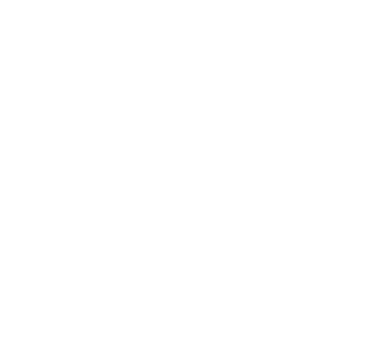

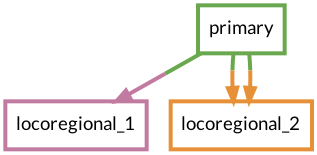

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
}



14:06:41 DEBUG

U > 0.05

14:06:41 DEBUG
                norm     0     1     2     3     4
primary        0.542 0.102 0.000 0.244 0.056 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.766 0.000
locoregional_2 0.521 0.000 0.069 0.000 0.000 0.301
14:06:41 DEBUG

F_hat
14:06:41 DEBUG
                   0     1     2     3     4     5
primary        0.944 0.402 0.000 0.244 0.056 0.000
locoregional_1 0.964 0.766 0.000 0.000 0.766 0.000
locoregional_2 0.891 0.370 0.370 0.000 0.000 0.301
14:06:41 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.371
Reg: 3.0
Loss: 62.371
U_clipped
 [[0.5416561961174011, 0.10211341828107834, 0.0, 0.24381190538406372, 0.0561806857585907, 0.0], [0.19735382497310638, 0.0, 0.0, 0.0, 0.7662739753723145, 0.0], [0.5205937623977661, 0.0, 0.06897713243961334, 0.0, 0.0, 0.3011665940284729]]


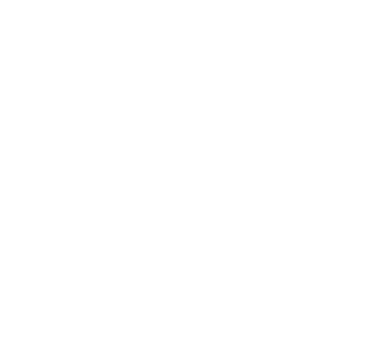

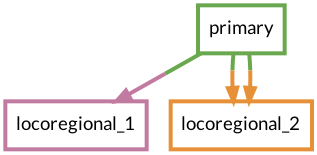

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
}



14:06:42 DEBUG

U > 0.05

14:06:42 DEBUG
                norm     0     1     2     3     4
primary        0.532 0.093 0.000 0.245 0.068 0.000
locoregional_1 0.196 0.000 0.000 0.000 0.748 0.000
locoregional_2 0.525 0.000 0.069 0.000 0.000 0.301
14:06:42 DEBUG

F_hat
14:06:42 DEBUG
                   0     1     2     3     4     5
primary        0.938 0.405 0.000 0.245 0.068 0.000
locoregional_1 0.945 0.748 0.000 0.000 0.748 0.000
locoregional_2 0.894 0.370 0.370 0.000 0.000 0.301
14:06:42 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.697
Reg: 3.0
Loss: 62.697
U_clipped
 [[0.5324772596359253, 0.09313945472240448, 0.0, 0.24451497197151184, 0.06784345954656601, 0.0], [0.19644282758235931, 0.0, 0.0, 0.0, 0.7484692335128784, 0.0], [0.5246080160140991, 0.0, 0.06926290690898895, 0.0, 0.0, 0.30059298872947693]]


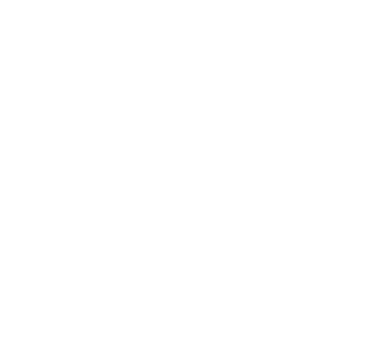

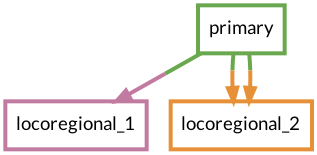

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
}



14:06:43 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------



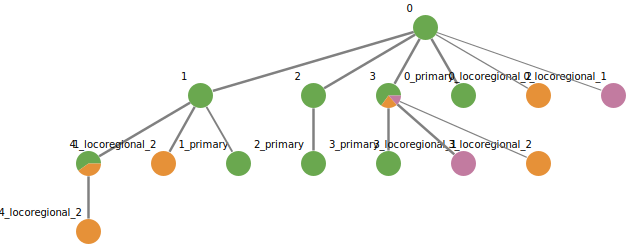

In [4]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


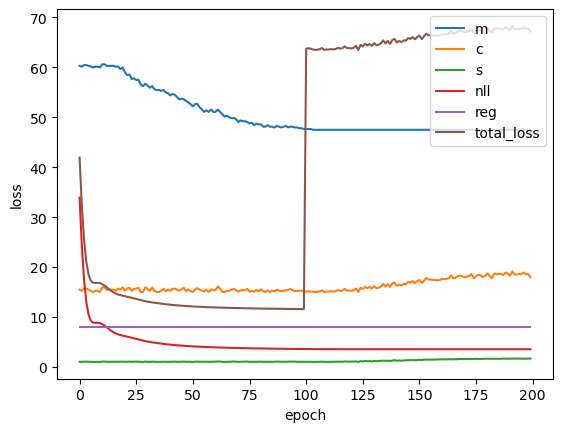

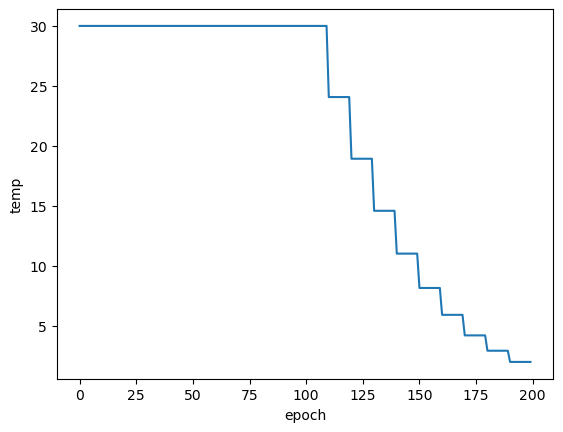

14:07:02 DEBUG

U > 0.05

14:07:02 DEBUG
                norm     0     1
primary        0.515 0.462 0.000
lymph_node     0.416 0.000 0.573
locoregional_1 0.221 0.152 0.628
locoregional_2 0.141 0.000 0.819
14:07:02 DEBUG

F_hat
14:07:02 DEBUG
                   0     1     2
primary        0.977 0.462 0.000
lymph_node     0.989 0.573 0.573
locoregional_1 1.000 0.779 0.628
locoregional_2 0.960 0.819 0.819
14:07:02 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 18.107619
****************************** BEST TREE ******************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.447
Reg: 3.999999761581421
Loss: 67.447
U_clipped
 [[0.5152135491371155, 0.4618902802467346, 0.0], [0.4159722924232483, 0.0, 0.5725372433662415], [0.22094294428825378, 0.15153931081295013, 0.6275177001953125], [0.1412244290113449, 0.0, 0.8185428977012634]]


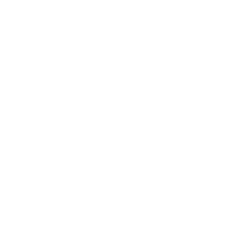

14:07:02 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


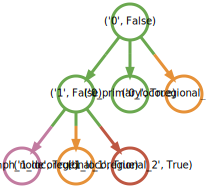

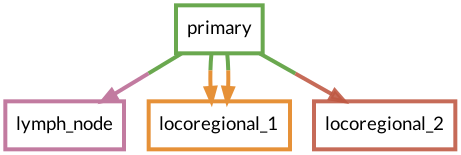

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
}



14:07:03 DEBUG

U > 0.05

14:07:03 DEBUG
                norm     0     1
primary        0.521 0.453 0.000
lymph_node     0.416 0.000 0.576
locoregional_1 0.220 0.151 0.630
locoregional_2 0.139 0.000 0.820
14:07:03 DEBUG

F_hat
14:07:03 DEBUG
                   0     1     2
primary        0.975 0.453 0.000
lymph_node     0.992 0.576 0.576
locoregional_1 1.000 0.780 0.630
locoregional_2 0.959 0.820 0.820
14:07:03 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 3.449
Reg: 3.999999761581421
Loss: 68.449
U_clipped
 [[0.5213773846626282, 0.45345622301101685, 0.0], [0.4158395230770111, 0.0, 0.5757980942726135], [0.2199447900056839, 0.15050655603408813, 0.6295487284660339], [0.13876445591449738, 0.0, 0.8197494745254517]]


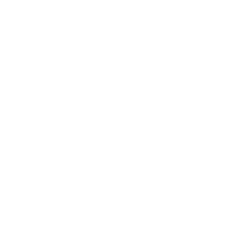

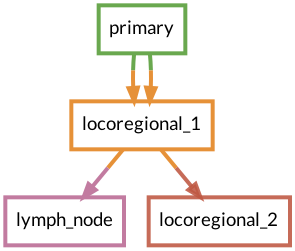

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
locoregional_1 -> lymph_node  [color="#e69138ff;0.5:#c27ba0ff", key=0, penwidth=3];
locoregional_1 -> locoregional_2  [color="#e69138ff;0.5:#be5742e1", key=0, penwidth=3];
}



14:07:04 DEBUG

U > 0.05

14:07:04 DEBUG
                norm     0     1
primary        0.515 0.455 0.000
lymph_node     0.415 0.000 0.578
locoregional_1 0.220 0.152 0.628
locoregional_2 0.139 0.000 0.825
14:07:04 DEBUG

F_hat
14:07:04 DEBUG
                   0     1     2
primary        0.970 0.455 0.000
lymph_node     0.993 0.578 0.578
locoregional_1 1.000 0.780 0.628
locoregional_2 0.964 0.825 0.825
14:07:04 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 3.474
Reg: 4.0
Loss: 68.474
U_clipped
 [[0.5150525569915771, 0.45494288206100464, 0.0], [0.4150087237358093, 0.0, 0.5779367089271545], [0.2202511578798294, 0.15208935737609863, 0.6276594996452332], [0.13929204642772675, 0.0, 0.8251966238021851]]


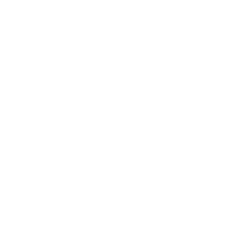

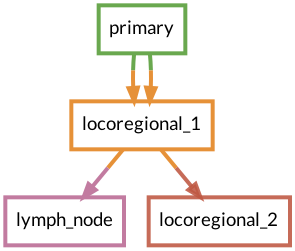

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
locoregional_1 -> lymph_node  [color="#e69138ff;0.5:#c27ba0ff", key=0, penwidth=3];
locoregional_1 -> locoregional_2  [color="#e69138ff;0.5:#be5742e1", key=0, penwidth=3];
}



14:07:06 DEBUG

U > 0.05

14:07:06 DEBUG
                norm     0     1
primary        0.521 0.448 0.000
lymph_node     0.414 0.000 0.572
locoregional_1 0.223 0.150 0.627
locoregional_2 0.140 0.000 0.826
14:07:06 DEBUG

F_hat
14:07:06 DEBUG
                   0     1     2
primary        0.969 0.448 0.000
lymph_node     0.986 0.572 0.572
locoregional_1 1.000 0.777 0.627
locoregional_2 0.966 0.826 0.826
14:07:06 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 3.5
Reg: 4.0
Loss: 68.5
U_clipped
 [[0.5214768052101135, 0.44759881496429443, 0.0], [0.41386643052101135, 0.0, 0.5723021626472473], [0.22302930057048798, 0.15011681616306305, 0.626853883266449], [0.13996265828609467, 0.0, 0.8258610963821411]]


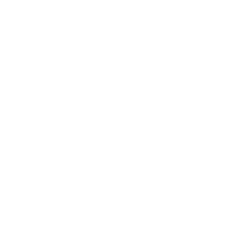

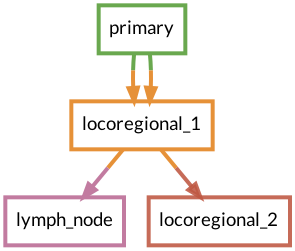

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
locoregional_1 -> lymph_node  [color="#e69138ff;0.5:#c27ba0ff", key=0, penwidth=3];
locoregional_1 -> locoregional_2  [color="#e69138ff;0.5:#be5742e1", key=0, penwidth=3];
}



14:07:07 DEBUG

U > 0.05

14:07:07 DEBUG
                norm     0     1
primary        0.517 0.448 0.000
lymph_node     0.416 0.000 0.575
locoregional_1 0.221 0.155 0.623
locoregional_2 0.139 0.000 0.826
14:07:07 DEBUG

F_hat
14:07:07 DEBUG
                   0     1     2
primary        0.965 0.448 0.000
lymph_node     0.992 0.575 0.575
locoregional_1 1.000 0.779 0.623
locoregional_2 0.965 0.826 0.826
14:07:07 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 3.506
Reg: 4.0
Loss: 68.506
U_clipped
 [[0.516782820224762, 0.4480516016483307, 0.0], [0.41634297370910645, 0.0, 0.5752819776535034], [0.22120261192321777, 0.15538278222084045, 0.6234145760536194], [0.13917365670204163, 0.0, 0.8256521224975586]]


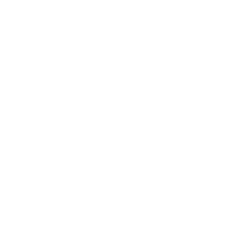

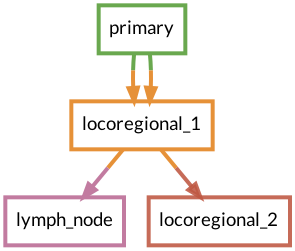

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
primary -> locoregional_1  [color="#6aa84fff;0.5:#e69138ff", key=1, penwidth=3];
locoregional_1 -> lymph_node  [color="#e69138ff;0.5:#c27ba0ff", key=0, penwidth=3];
locoregional_1 -> locoregional_2  [color="#e69138ff;0.5:#be5742e1", key=0, penwidth=3];
}



14:07:08 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------



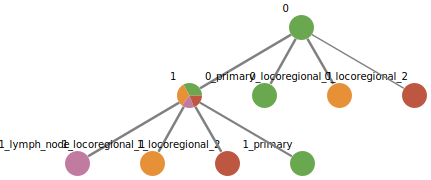

In [5]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'purple', 'darkorange', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)


num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


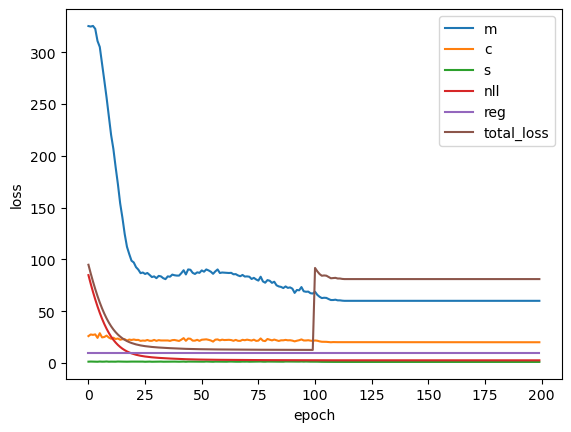

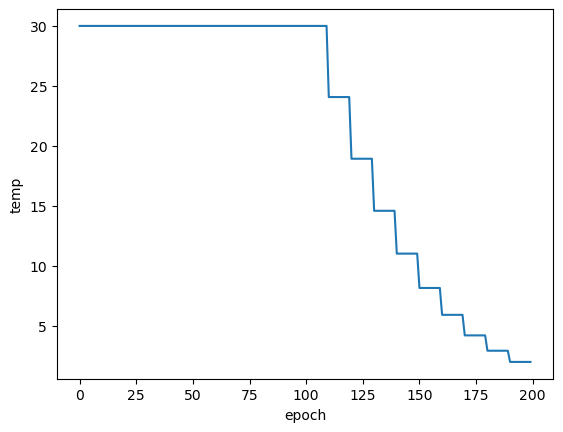

14:07:28 DEBUG

U > 0.05

14:07:28 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.232 0.000 0.215 0.532 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.109 0.000 0.000 0.000 0.806 0.000 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.000 0.000 0.000 0.000 0.517 0.311 0.000
lymph_node     0.130 0.000 0.000 0.000 0.286 0.564 0.000 0.000 0.000
locoregional_3 0.125 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.859
14:07:28 DEBUG

F_hat
14:07:28 DEBUG
                   0     1     2     3     4     5     6     7     8
primary        0.978 0.000 0.747 0.532 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.915 0.806 0.806 0.000 0.806 0.000 0.000 0.000 0.000
locoregional_2 0.968 0.829 0.829 0.000 0.829 0.000 0.517 0.311 0.000
lymph_node     0.980 0.850 0.850 0.000 0.850 0.564 0.000 0.000 0.000
locoregional_3 0.984 0.859 0.859 0.000 0.859 0.000 0.000 0.000 0.859
14:07:28 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 19.168518
****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.486
Reg: 5.000000476837158
Loss: 93.486
U_clipped
 [[0.23151937127113342, 0.0, 0.21478717029094696, 0.531997799873352, 0.0, 0.0, 0.0, 0.0, 0.0], [0.10944841057062149, 0.0, 0.0, 0.0, 0.805870532989502, 0.0, 0.0, 0.0, 0.0], [0.13922129571437836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5174668431282043, 0.31128302216529846, 0.0], [0.12954071164131165, 0.0, 0.0, 0.0, 0.28627631068229675, 0.5639251470565796, 0.0, 0.0, 0.0], [0.12515553832054138, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8585320711135864]]


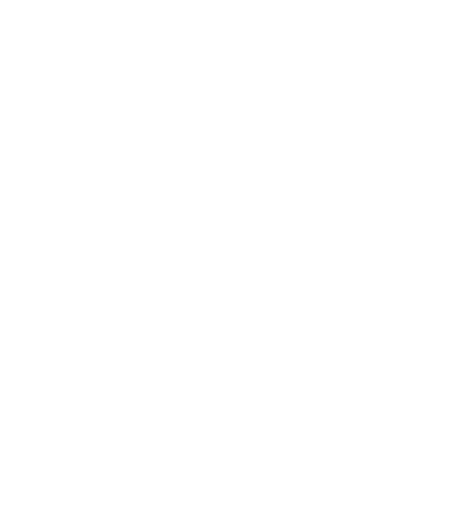

14:07:29 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


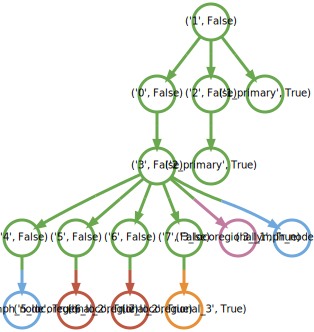

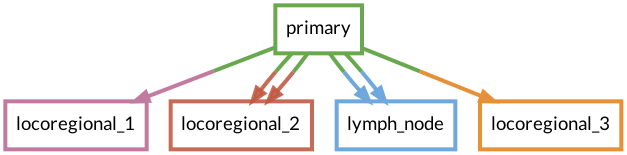

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_3 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=1, penwidth=3];
primary -> locoregional_3  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
}



14:07:29 DEBUG

U > 0.05

14:07:29 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.235 0.000 0.216 0.529 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.803 0.000 0.000 0.000 0.000
locoregional_2 0.140 0.000 0.000 0.000 0.000 0.000 0.504 0.312 0.000
lymph_node     0.127 0.000 0.000 0.000 0.279 0.569 0.000 0.000 0.000
locoregional_3 0.126 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.858
14:07:29 DEBUG

F_hat
14:07:29 DEBUG
                   0     1     2     3     4     5     6     7     8
primary        0.980 0.000 0.745 0.529 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.912 0.803 0.803 0.000 0.803 0.000 0.000 0.000 0.000
locoregional_2 0.956 0.816 0.816 0.000 0.816 0.000 0.504 0.312 0.000
lymph_node     0.976 0.849 0.849 0.000 0.849 0.569 0.000 0.000 0.000
locoregional_3 0.983 0.858 0.858 0.000 0.858 0.000 0.000 0.000 0.858
14:07:29 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.495
Reg: 5.0
Loss: 93.495
U_clipped
 [[0.23472951352596283, 0.0, 0.21599355340003967, 0.5292845368385315, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1095317155122757, 0.0, 0.0, 0.0, 0.8028333187103271, 0.0, 0.0, 0.0, 0.0], [0.13979016244411469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5041536092758179, 0.31179019808769226, 0.0], [0.12685857713222504, 0.0, 0.0, 0.0, 0.2793996334075928, 0.5692794322967529, 0.0, 0.0, 0.0], [0.12550808489322662, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8578448295593262]]


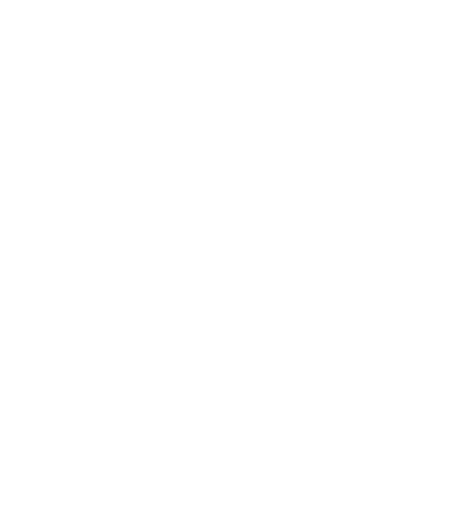

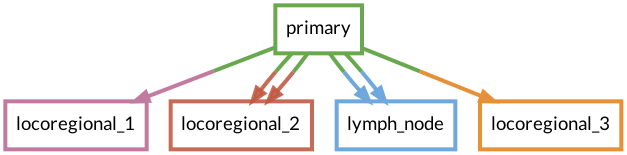

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_3 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=1, penwidth=3];
primary -> locoregional_3  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
}



14:07:31 DEBUG

U > 0.05

14:07:31 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.231 0.000 0.217 0.532 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.801 0.000 0.000 0.000 0.000
locoregional_2 0.140 0.000 0.000 0.000 0.000 0.000 0.522 0.311 0.000
lymph_node     0.130 0.000 0.000 0.000 0.267 0.565 0.000 0.000 0.000
locoregional_3 0.121 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.859
14:07:31 DEBUG

F_hat
14:07:31 DEBUG
                   0     1     2     3     4     5     6     7     8
primary        0.980 0.000 0.749 0.532 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.911 0.801 0.801 0.000 0.801 0.000 0.000 0.000 0.000
locoregional_2 0.972 0.833 0.833 0.000 0.833 0.000 0.522 0.311 0.000
lymph_node     0.962 0.833 0.833 0.000 0.833 0.565 0.000 0.000 0.000
locoregional_3 0.980 0.859 0.859 0.000 0.859 0.000 0.000 0.000 0.859
14:07:31 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.506
Reg: 5.0
Loss: 93.506
U_clipped
 [[0.23119042813777924, 0.0, 0.21670573949813843, 0.5323243737220764, 0.0, 0.0, 0.0, 0.0, 0.0], [0.10993392765522003, 0.0, 0.0, 0.0, 0.8012012243270874, 0.0, 0.0, 0.0, 0.0], [0.13956321775913239, 0.0, 0.0, 0.0, 0.0, 0.0, 0.521605372428894, 0.3111317753791809, 0.0], [0.12967650592327118, 0.0, 0.0, 0.0, 0.26747646927833557, 0.5651269555091858, 0.0, 0.0, 0.0], [0.12093964219093323, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8587235808372498]]


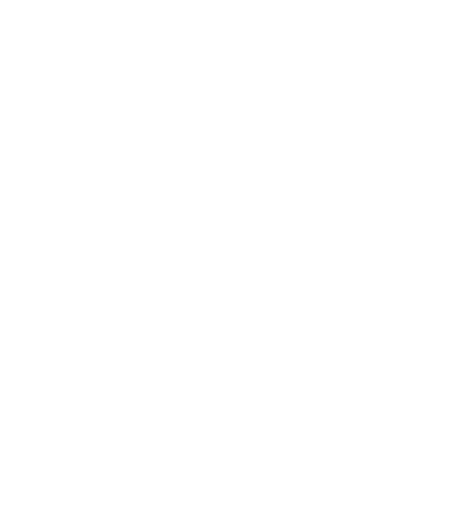

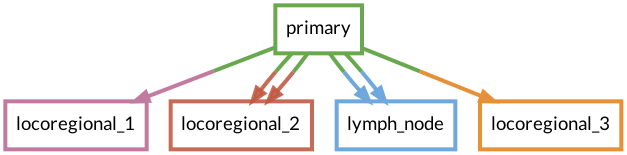

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_3 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=1, penwidth=3];
primary -> locoregional_3  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
}



14:07:32 DEBUG

U > 0.05

14:07:32 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.235 0.000 0.208 0.534 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.803 0.000 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.000 0.000 0.000 0.000 0.507 0.310 0.000
lymph_node     0.126 0.000 0.000 0.000 0.265 0.567 0.000 0.000 0.000
locoregional_3 0.124 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.861
14:07:32 DEBUG

F_hat
14:07:32 DEBUG
                   0     1     2     3     4     5     6     7     8
primary        0.978 0.000 0.743 0.534 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.913 0.803 0.803 0.000 0.803 0.000 0.000 0.000 0.000
locoregional_2 0.956 0.817 0.817 0.000 0.817 0.000 0.507 0.310 0.000
lymph_node     0.958 0.832 0.832 0.000 0.832 0.567 0.000 0.000 0.000
locoregional_3 0.986 0.861 0.861 0.000 0.861 0.000 0.000 0.000 0.861
14:07:32 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.509
Reg: 5.000000476837158
Loss: 93.509
U_clipped
 [[0.23498791456222534, 0.0, 0.20825202763080597, 0.5344977378845215, 0.0, 0.0, 0.0, 0.0, 0.0], [0.10963767021894455, 0.0, 0.0, 0.0, 0.8031609654426575, 0.0, 0.0, 0.0, 0.0], [0.13944320380687714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5071263313293457, 0.3096942603588104, 0.0], [0.12618422508239746, 0.0, 0.0, 0.0, 0.264799565076828, 0.5667945742607117, 0.0, 0.0, 0.0], [0.12437507510185242, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8613836765289307]]


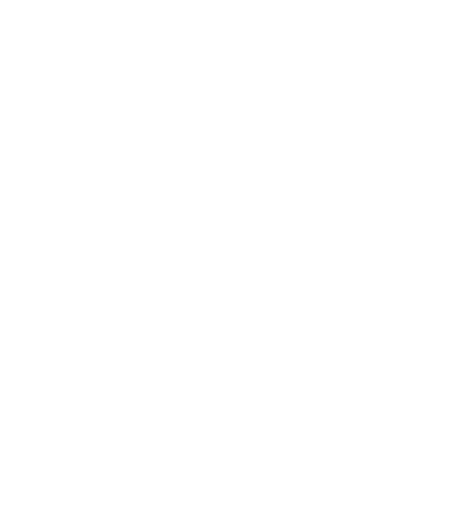

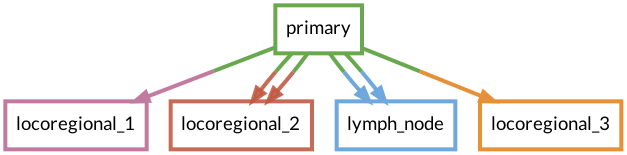

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_3 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=1, penwidth=3];
primary -> locoregional_3  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
}



14:07:33 DEBUG

U > 0.05

14:07:33 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.232 0.000 0.220 0.526 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.109 0.000 0.000 0.000 0.802 0.000 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.000 0.000 0.000 0.000 0.516 0.311 0.000
lymph_node     0.129 0.000 0.000 0.000 0.284 0.559 0.000 0.000 0.000
locoregional_3 0.125 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.862
14:07:33 DEBUG

F_hat
14:07:33 DEBUG
                   0     1     2     3     4     5     6     7     8
primary        0.978 0.000 0.747 0.526 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.911 0.802 0.802 0.000 0.802 0.000 0.000 0.000 0.000
locoregional_2 0.966 0.827 0.827 0.000 0.827 0.000 0.516 0.311 0.000
lymph_node     0.972 0.843 0.843 0.000 0.843 0.559 0.000 0.000 0.000
locoregional_3 0.987 0.862 0.862 0.000 0.862 0.000 0.000 0.000 0.862
14:07:33 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.509
Reg: 5.0
Loss: 93.509
U_clipped
 [[0.23150716722011566, 0.0, 0.22048860788345337, 0.5262889862060547, 0.0, 0.0, 0.0, 0.0, 0.0], [0.10875815898180008, 0.0, 0.0, 0.0, 0.8024599552154541, 0.0, 0.0, 0.0, 0.0], [0.13911621272563934, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5164493322372437, 0.31086960434913635, 0.0], [0.12899300456047058, 0.0, 0.0, 0.0, 0.28395381569862366, 0.5590860843658447, 0.0, 0.0, 0.0], [0.12455528974533081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8622463941574097]]


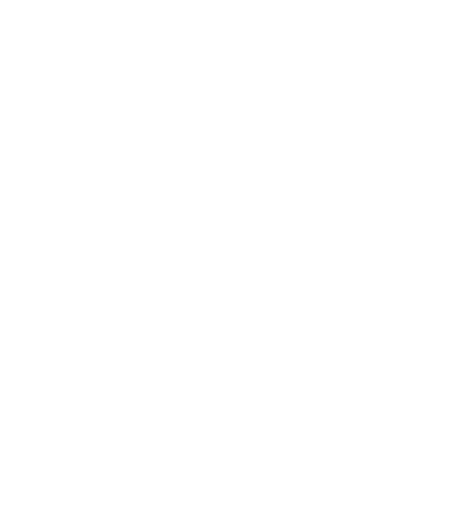

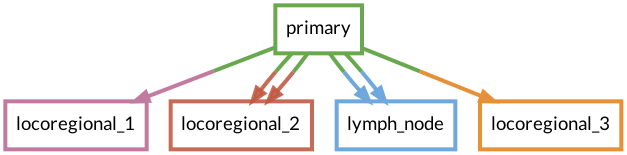

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_1 [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_2 [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional_3 [color="#e69138ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> locoregional_1  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional_2  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#6fa8dcff", key=1, penwidth=3];
primary -> locoregional_3  [color="#6aa84fff;0.5:#e69138ff", key=0, penwidth=3];
}

-----------------------------------

14:07:35 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


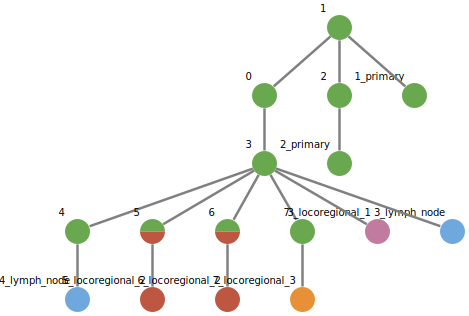

In [6]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange', 'royalblue', 'red', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']


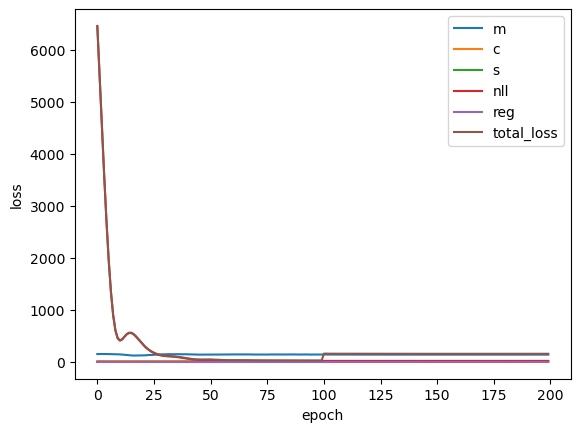

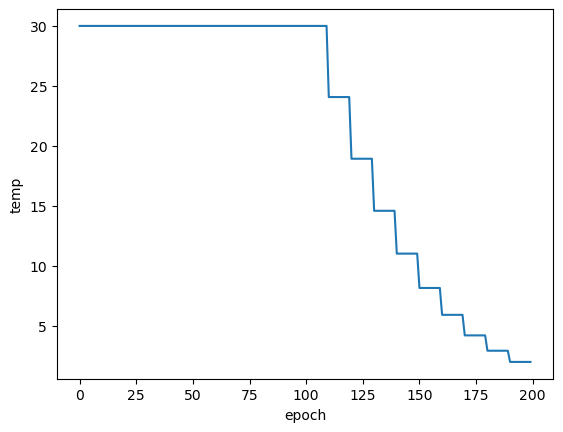

14:07:57 DEBUG

U > 0.05

14:07:57 DEBUG
              norm     0     1     2     3     4
primary      0.369 0.193 0.214 0.100 0.057 0.068
lymph_node   0.479 0.160 0.094 0.100 0.106 0.061
locoregional 0.636 0.092 0.000 0.080 0.000 0.097
distant      0.479 0.094 0.072 0.132 0.122 0.101
14:07:57 DEBUG

F_hat
14:07:57 DEBUG
                 0     1     2     3     4     5
primary      1.000 0.631 0.214 0.156 0.057 0.068
lymph_node   1.000 0.521 0.094 0.206 0.106 0.061
locoregional 0.906 0.269 0.000 0.080 0.000 0.097
distant      1.000 0.521 0.072 0.254 0.122 0.101
14:07:57 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 21.601858
****************************** BEST TREE ******************************

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 18.617
Reg: 4.0
Loss: 172.617
U_clipped
 [[0.3686158359050751, 0.1926516592502594, 0.21438546478748322, 0.09973514080047607, 0.056663546711206436, 0.06794839352369308], [0.47892001271247864, 0.16043135523796082, 0.09378688782453537, 0.10013224929571152, 0.10563229024410248, 0.061097148805856705], [0.6361006498336792, 0.09176518023014069, 0.0, 0.08033080399036407, 0.0, 0.0973789170384407], [0.4794344902038574, 0.09378857910633087, 0.07150889188051224, 0.1322244107723236, 0.12198558449745178, 0.1010579988360405]]


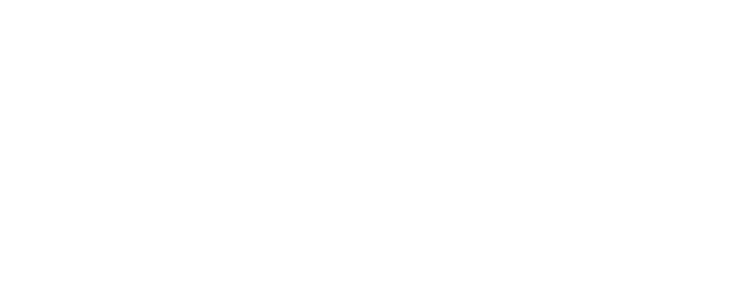

14:07:58 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


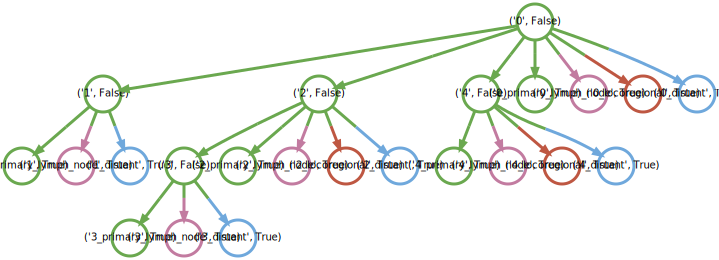

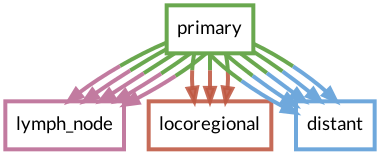

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
distant [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=2, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=3, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=4, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=2, penwidth=3]

14:07:58 DEBUG

U > 0.05

14:07:58 DEBUG
              norm     0     1     2     3     4
primary      0.372 0.121 0.206 0.077 0.085 0.138
lymph_node   0.474 0.082 0.148 0.172 0.071 0.053
locoregional 0.645 0.080 0.000 0.000 0.096 0.097
distant      0.475 0.096 0.057 0.147 0.131 0.092
14:07:58 DEBUG

F_hat
14:07:58 DEBUG
                 0     1     2     3     4     5
primary      1.000 0.628 0.206 0.162 0.085 0.138
lymph_node   1.000 0.526 0.148 0.243 0.071 0.053
locoregional 0.918 0.272 0.000 0.096 0.096 0.097
distant      1.000 0.525 0.057 0.278 0.131 0.092
14:07:58 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 19.58
Reg: 3.999999761581421
Loss: 173.58
U_clipped
 [[0.37224406003952026, 0.12093115597963333, 0.20626111328601837, 0.07672881335020065, 0.08534900844097137, 0.13848590850830078], [0.4742411971092224, 0.08227179199457169, 0.14780886471271515, 0.17186157405376434, 0.0710374042391777, 0.05277908593416214], [0.6453568935394287, 0.0801171362400055, 0.0, 0.0, 0.09567814320325851, 0.09659650176763535], [0.4754916727542877, 0.09632643312215805, 0.0574885718524456, 0.1468920111656189, 0.1314397156238556, 0.09236161410808563]]


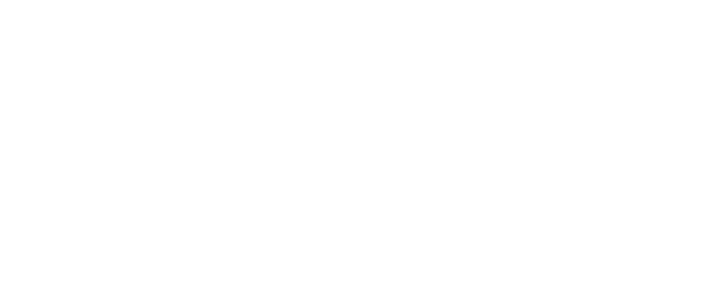

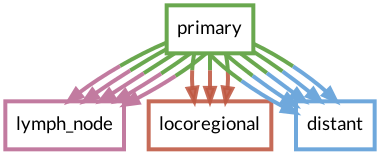

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
distant [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=2, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=3, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=4, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=2, penwidth=3]

14:08:00 DEBUG

U > 0.05

14:08:00 DEBUG
              norm     0     1     2     3     4
primary      0.370 0.107 0.183 0.136 0.081 0.123
lymph_node   0.474 0.121 0.113 0.110 0.105 0.077
locoregional 0.646 0.000 0.092 0.074 0.000 0.105
distant      0.482 0.062 0.067 0.100 0.169 0.119
14:08:00 DEBUG

F_hat
14:08:00 DEBUG
                 0     1     2     3     4     5
primary      1.000 0.630 0.183 0.217 0.081 0.123
lymph_node   1.000 0.526 0.113 0.214 0.105 0.077
locoregional 0.917 0.272 0.092 0.074 0.000 0.105
distant      1.000 0.518 0.067 0.269 0.169 0.119
14:08:00 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 19.928
Reg: 4.0
Loss: 173.928
U_clipped
 [[0.3695653975009918, 0.1068972572684288, 0.18307648599147797, 0.13641493022441864, 0.08077679574489594, 0.12326914817094803], [0.47414568066596985, 0.1211642250418663, 0.11294668912887573, 0.10970360785722733, 0.10465254634618759, 0.07738728076219559], [0.645588755607605, 0.0, 0.09235545247793198, 0.07434974610805511, 0.0, 0.10490434616804123], [0.4823509156703949, 0.06224610656499863, 0.06729568541049957, 0.10018914937973022, 0.16911852359771729, 0.11879952251911163]]


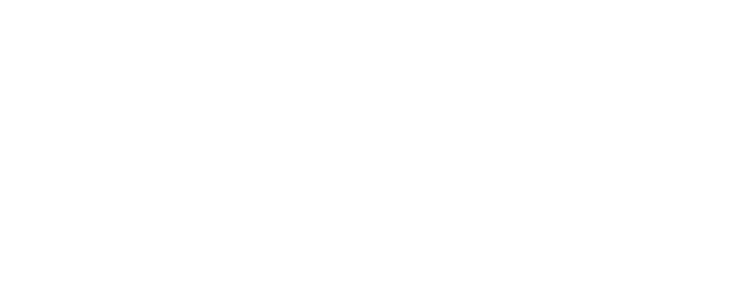

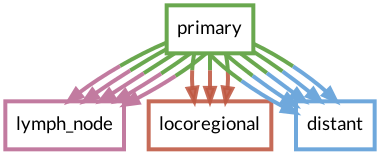

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
distant [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=2, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=3, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=4, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=2, penwidth=3]

14:08:01 DEBUG

U > 0.05

14:08:01 DEBUG
              norm     0     1     2     3     4
primary      0.373 0.164 0.140 0.130 0.102 0.090
lymph_node   0.482 0.089 0.130 0.092 0.080 0.127
locoregional 0.637 0.050 0.083 0.089 0.000 0.093
distant      0.482 0.131 0.072 0.123 0.146 0.000
14:08:01 DEBUG

F_hat
14:08:01 DEBUG
                 0     1     2     3     4     5
primary      1.000 0.627 0.140 0.232 0.102 0.090
lymph_node   1.000 0.518 0.130 0.172 0.080 0.127
locoregional 0.952 0.315 0.083 0.089 0.000 0.093
distant      0.953 0.471 0.072 0.269 0.146 0.000
14:08:01 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 20.709
Reg: 4.0
Loss: 174.709
U_clipped
 [[0.37328627705574036, 0.16436612606048584, 0.1401098221540451, 0.13049474358558655, 0.10155998170375824, 0.0901830717921257], [0.48171067237854004, 0.08921122550964355, 0.12966206669807434, 0.09155292063951492, 0.08041021972894669, 0.12745295464992523], [0.6365760564804077, 0.05027635768055916, 0.0827842652797699, 0.08917538076639175, 0.0, 0.09292333573102951], [0.4818646311759949, 0.13053281605243683, 0.07184019684791565, 0.12264435738325119, 0.14642085134983063, 0.0]]


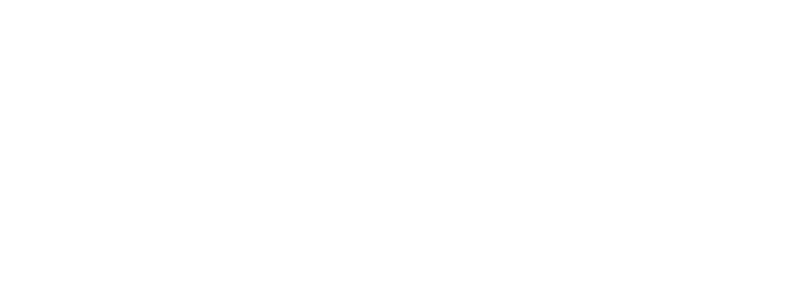

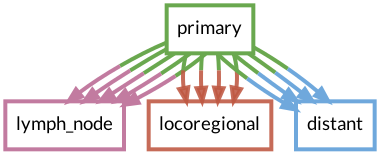

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
distant [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=2, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=3, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=4, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=2, penwidth=3]

14:08:03 DEBUG

U > 0.05

14:08:03 DEBUG
              norm     0     1     2     3     4
primary      0.372 0.163 0.210 0.079 0.107 0.070
lymph_node   0.483 0.103 0.072 0.123 0.112 0.107
locoregional 0.647 0.082 0.000 0.069 0.000 0.112
distant      0.480 0.073 0.115 0.062 0.144 0.125
14:08:03 DEBUG

F_hat
14:08:03 DEBUG
                 0     1     2     3     4     5
primary      1.000 0.628 0.210 0.186 0.107 0.070
lymph_node   1.000 0.517 0.072 0.235 0.112 0.107
locoregional 0.910 0.263 0.000 0.069 0.000 0.112
distant      1.000 0.520 0.115 0.206 0.144 0.125
14:08:03 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 20.754
Reg: 4.0
Loss: 174.754
U_clipped
 [[0.3716207444667816, 0.16251829266548157, 0.21021418273448944, 0.07889028638601303, 0.10678277164697647, 0.06997360289096832], [0.4829251170158386, 0.10290881246328354, 0.07189953327178955, 0.12339606881141663, 0.1115148738026619, 0.1073557659983635], [0.6472054719924927, 0.0817006379365921, 0.0, 0.06864684820175171, 0.0, 0.11231856048107147], [0.4798935353755951, 0.0734441950917244, 0.1153484657406807, 0.06166171282529831, 0.14438481628894806, 0.12526723742485046]]


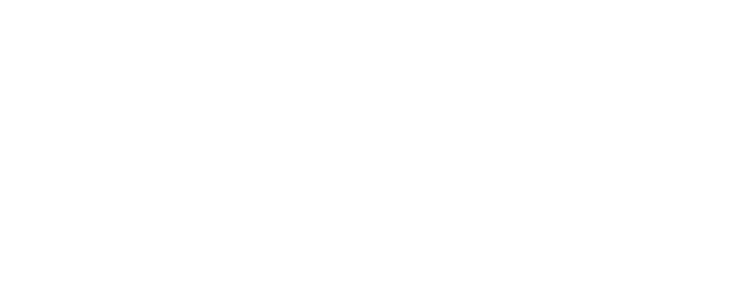

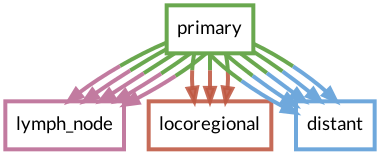

digraph  {
dpi=300;
primary [color="#6aa84fff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
lymph_node [color="#c27ba0ff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
locoregional [color="#be5742e1", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
distant [color="#6fa8dcff", fillcolor=white, fontname=Lato, penwidth="3.0", shape=box];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=0, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=1, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=2, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=3, penwidth=3];
primary -> lymph_node  [color="#6aa84fff;0.5:#c27ba0ff", key=4, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=0, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=1, penwidth=3];
primary -> locoregional  [color="#6aa84fff;0.5:#be5742e1", key=2, penwidth=3]

14:08:05 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


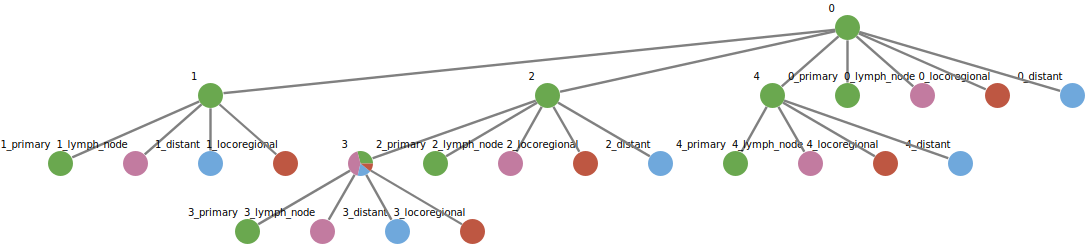

In [7]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'hotpink']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

